<a href="https://colab.research.google.com/github/springboardmentor2468a-lab/Projects/blob/Divyadharshini-R/week4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/Indian_Kids_Screen_Time.csv')
sns.set(style="whitegrid")

df.head()



,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural
0,14,Male,3.99,Smartphone,True,0.42,"Poor Sleep, Eye Strain",Urban
1,11,Female,4.61,Laptop,True,0.30,Poor Sleep,Urban
2,18,Female,3.73,TV,True,0.32,Poor Sleep,Urban
3,15,Female,1.21,Laptop,False,0.39,NaN,Urban
4,12,Female,5.89,Smartphone,True,0.49,"Poor Sleep, Anxiety",Urban


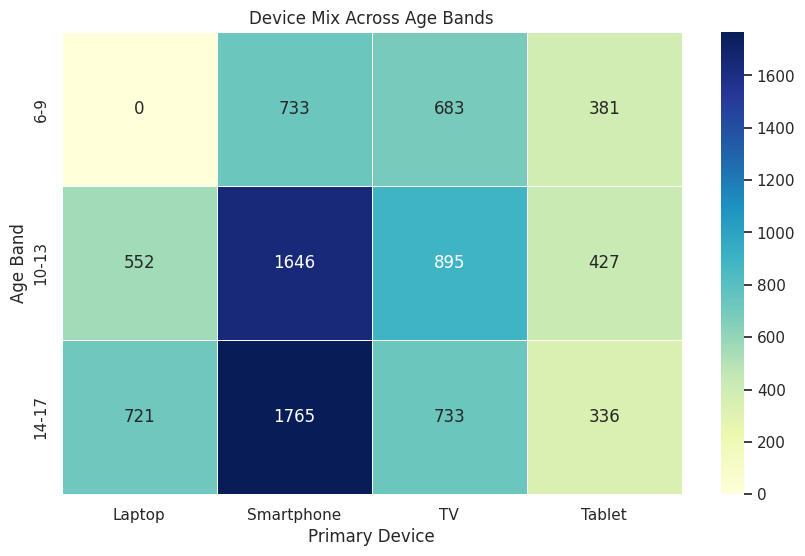

In [41]:
#Device Mix Across Age Bands
# Define age groups and create the 'Age_Band' column
bins = [6, 10, 14, 18]  # Adjust bins as necessary based on your data's age range
labels = ['6-9', '10-13', '14-17']
df['Age_Band'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False) # Assuming right=False to include lower bound

age_device_ct = pd.crosstab(df['Age_Band'], df['Primary_Device'])

# Plot heatmap
plt.figure(figsize=(10,6))
sns.heatmap(age_device_ct, annot=True, fmt="d", cmap="YlGnBu", linewidths=0.5)
plt.title("Device Mix Across Age Bands")
plt.xlabel("Primary Device")
plt.ylabel("Age Band")
plt.show()

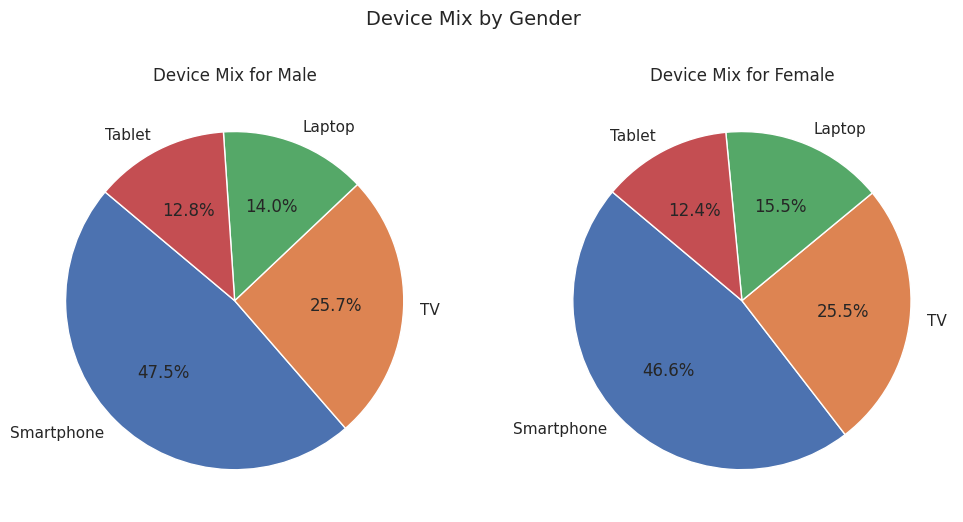

In [42]:
#Device Mix by Gender
fig, axes = plt.subplots(1, 2, figsize=(12,6))

for i, gender in enumerate(df['Gender'].unique()):
    subset = df[df['Gender'] == gender]['Primary_Device'].value_counts()
    axes[i].pie(subset, labels=subset.index, autopct='%1.1f%%', startangle=140)
    axes[i].set_title(f"Device Mix for {gender}")

plt.suptitle("Device Mix by Gender", fontsize=14)
plt.show()

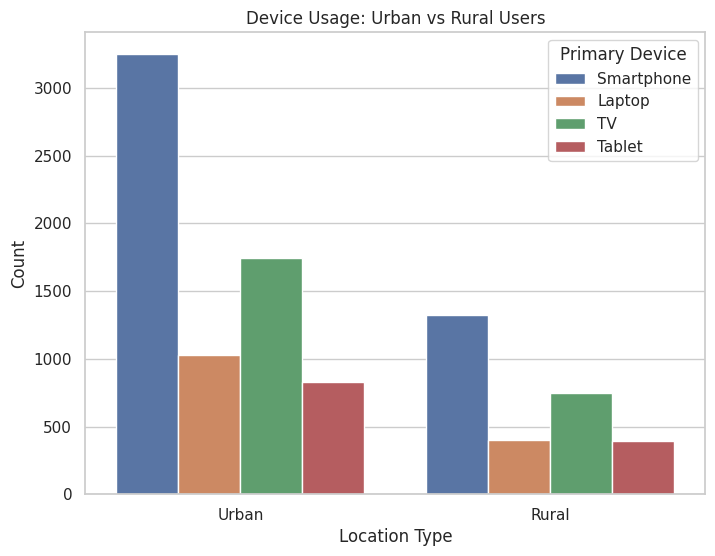

In [43]:
#Device Usage by Urban vs Rural
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='Urban_or_Rural', hue='Primary_Device')
plt.title("Device Usage: Urban vs Rural Users")
plt.xlabel("Location Type")
plt.ylabel("Count")
plt.legend(title="Primary Device")
plt.show()


/tmp/ipython-input-3857106221.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  edu_rec_ratio = df.groupby('Age_Band')['Educational_to_Recreational_Ratio'].mean()


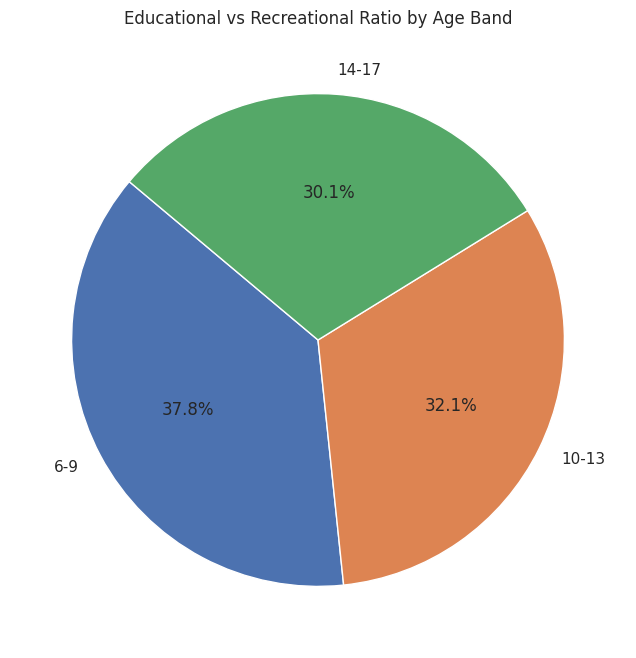

In [49]:
#Educational vs Recreational Ratio by Age Band
edu_rec_ratio = df.groupby('Age_Band')['Educational_to_Recreational_Ratio'].mean()
plt.figure(figsize=(8,8))
plt.pie(edu_rec_ratio, labels=edu_rec_ratio.index, autopct='%1.1f%%', startangle=140)
plt.title("Educational vs Recreational Ratio by Age Band")
plt.show()

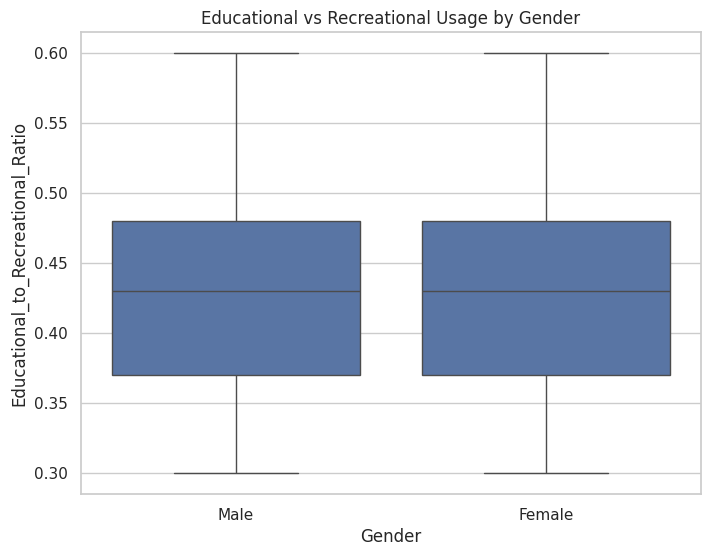

In [45]:
#Educational vs Recreational Ratio by Gender
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='Gender', y='Educational_to_Recreational_Ratio')
plt.title("Educational vs Recreational Usage by Gender")
plt.show()


/tmp/ipython-input-934401402.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = df.pivot_table(values='Educational_to_Recreational_Ratio',


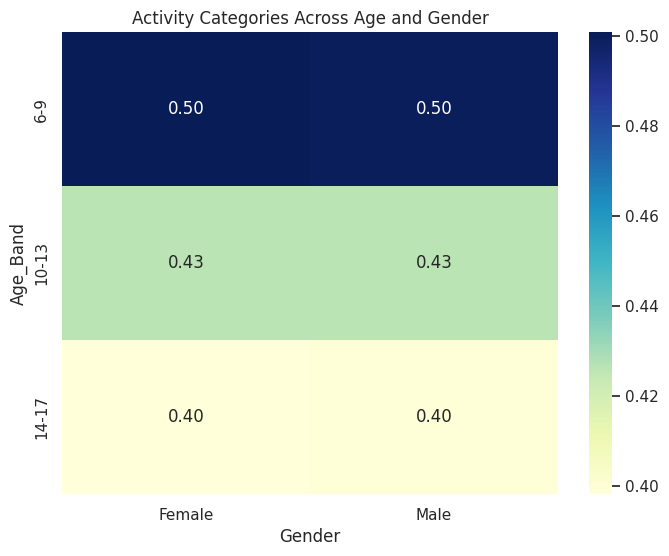

In [46]:
#Activity Categories Across Demographics
pivot_table = df.pivot_table(values='Educational_to_Recreational_Ratio',
                             index='Age_Band', columns='Gender', aggfunc='mean')
plt.figure(figsize=(8,6))
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title("Activity Categories Across Age and Gender")
plt.show()


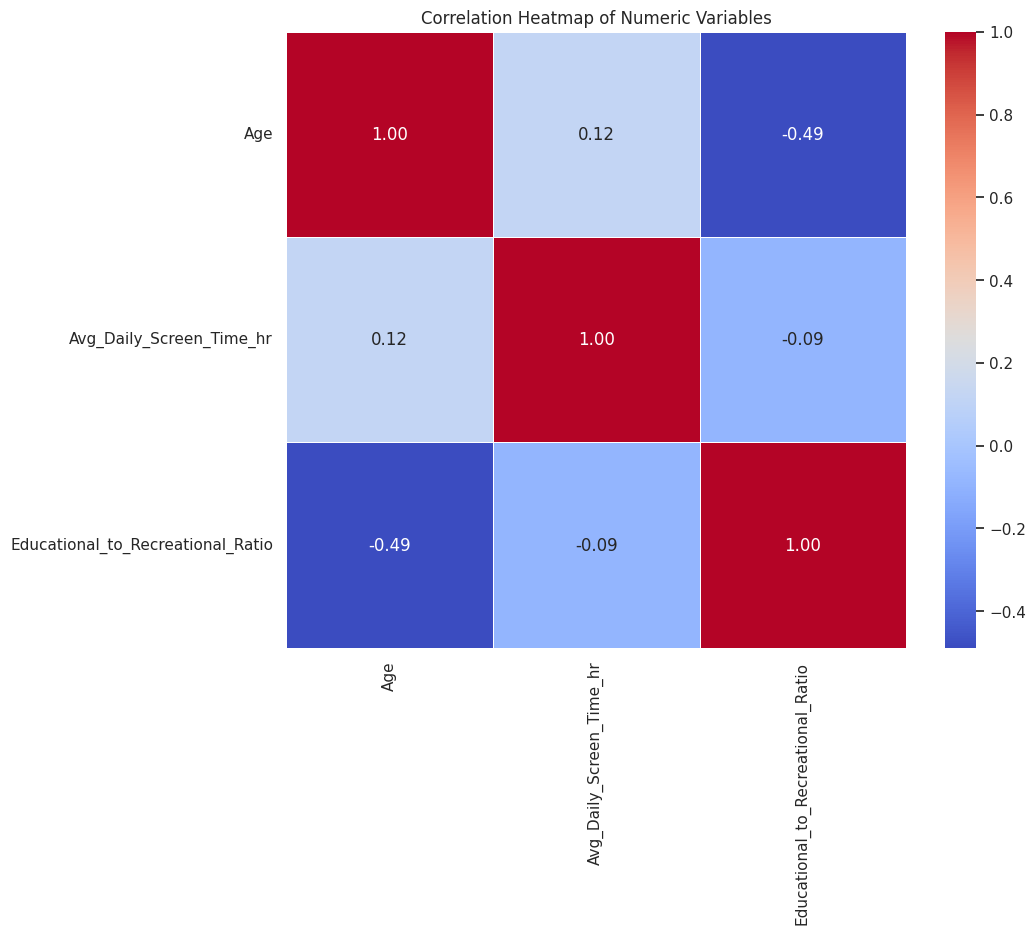

In [47]:
#Health Impacts vs Screen Time
numeric_df = df.select_dtypes(include='number')

# Compute correlation matrix
corr = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Variables")
plt.show()

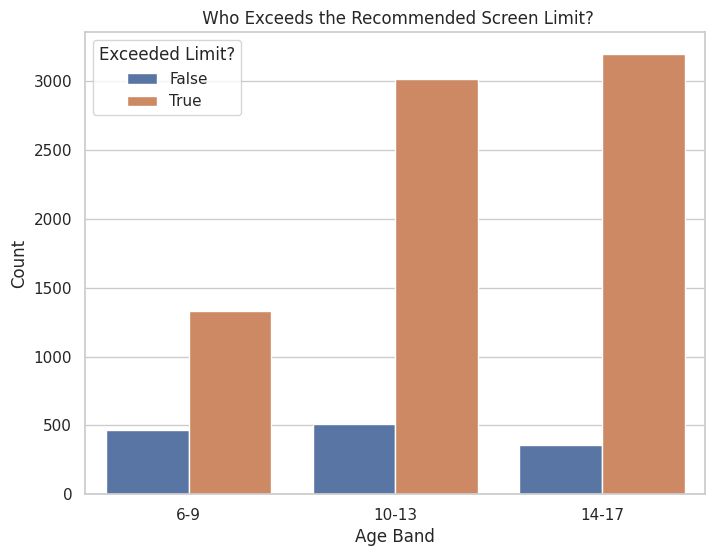

In [48]:
#Exceeded Screen Limit by Age Band
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='Age_Band', hue='Exceeded_Recommended_Limit')
plt.title(" Who Exceeds the Recommended Screen Limit?")
plt.xlabel("Age Band")
plt.ylabel("Count")
plt.legend(title="Exceeded Limit?")
plt.show()

# Insights:
• Teenagers and young adults exceed screen limits most often.

• Older groups maintain healthier digital habits.

• Educational workload and entertainment drive overuse.

• Indicates need for digital well-being awareness.
